In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "./movielens/movielens100k/"

In [3]:
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [4]:
ratings_df.head()

,movieId,rating,timestamp
userId,,,
1,31,2.5,1260759144
1,1029,3.0,1260759179
1,1061,3.0,1260759182
1,1129,2.0,1260759185
1,1172,4.0,1260759205


### Rating stats

In [5]:
num_uniq_users = ratings_df.reset_index()['userId'].nunique()
num_uniq_movies = ratings_df['movieId'].nunique()
print('unique # of users ', num_uniq_users)
print('unique # of movies ', num_uniq_movies)

unique # of users  671
unique # of movies  9066


In [6]:
ratings_df['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [7]:
ratings_df.isnull().sum()

movieId      0
rating       0
timestamp    0
dtype: int64

In [8]:
ratings_df = ratings_df.reset_index()

### Relation with ratings and # of audiences

In [9]:
user_rating_cnt = pd.DataFrame({'count': ratings_df.groupby(['userId','rating']).size()})
user_rating_cnt = user_rating_cnt.reset_index()
user_rating_cnt.head()

,userId,rating,count
0,1,1.0,2
1,1,2.0,7
2,1,2.5,3
3,1,3.0,4
4,1,3.5,1


In [10]:
rating_cnt_by_user = ratings_df.groupby('userId')['movieId'].count()
rating_cnt_by_user.describe()

count     671.000000
mean      149.037258
std       231.226948
min        20.000000
25%        37.000000
50%        71.000000
75%       161.000000
max      2391.000000
Name: movieId, dtype: float64

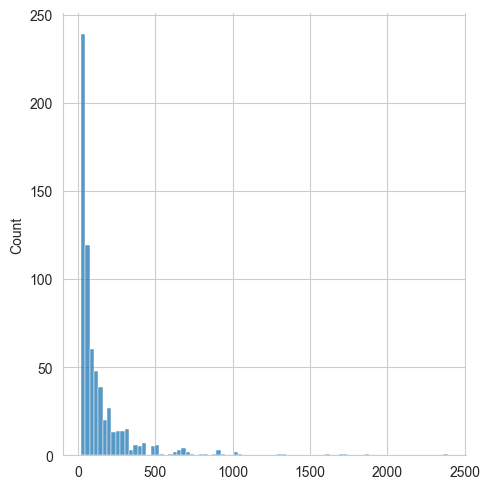

In [11]:
sns.displot(rating_cnt_by_user.values)

In [12]:
user_rating_stats = user_rating_cnt.groupby('userId').agg({'rating':['mean','std'], 'count':'sum'})
user_rating_stats = user_rating_stats.reset_index()
user_rating_stats.columns = ['userId','rating_avg','rating_std','watching_movie_cnt']
user_rating_stats.head()

,userId,rating_avg,rating_std,watching_movie_cnt
0,1,2.666667,1.080123,20
1,2,3.000000,1.581139,76
2,3,3.500000,1.080123,51
3,4,3.000000,1.581139,204
4,5,3.428571,1.205148,100


### Movie rating distribution
* The more people watch the movie, the better rating?

In [13]:
movie_agg_df = ratings_df.groupby(['movieId']).agg({
    'userId':'count',
    'rating':['mean','std']}).reset_index()
movie_agg_df.columns = ['movieId','num_users_watch','avg_rating','std_rating']
movie_agg_df.head()

,movieId,num_users_watch,avg_rating,std_rating
0,1,247,3.872470,0.958981
1,2,107,3.401869,0.880714
2,3,59,3.161017,1.150115
3,4,13,2.384615,0.938835
4,5,56,3.267857,0.948512


<Axes: ylabel='Density'>

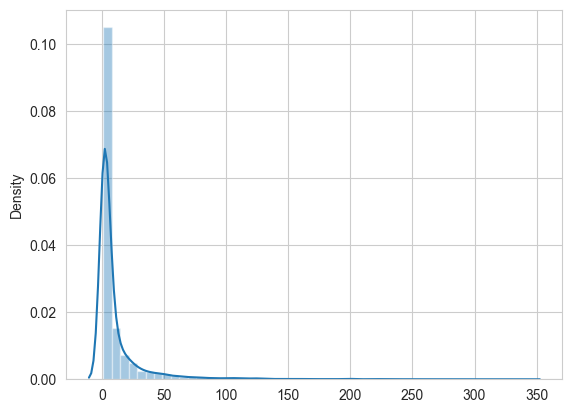

In [14]:
sns.distplot(movie_agg_df['num_users_watch'].values)

In [15]:
movie_agg_df['num_users_watch'].describe()

count    9066.000000
mean       11.030664
std        24.050800
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       341.000000
Name: num_users_watch, dtype: float64

<Axes: xlabel='num_users_watch', ylabel='avg_rating'>

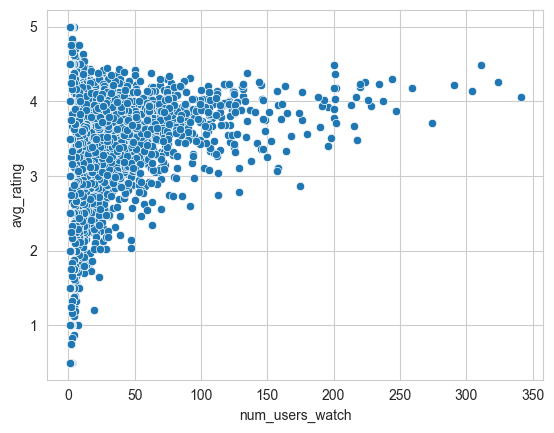

In [16]:
sns.scatterplot(data=movie_agg_df, x='num_users_watch',y='avg_rating')

In [17]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [18]:
movie_agg_df = pd.merge(movie_agg_df, movies_df.reset_index(), on='movieId',how='left')
movie_agg_df.head()

,movieId,num_users_watch,avg_rating,std_rating,title,genres
0,1,247,3.872470,0.958981,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,107,3.401869,0.880714,Jumanji (1995),Adventure|Children|Fantasy
2,3,59,3.161017,1.150115,Grumpier Old Men (1995),Comedy|Romance
3,4,13,2.384615,0.938835,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,56,3.267857,0.948512,Father of the Bride Part II (1995),Comedy


In [19]:
movie_agg_df.sort_values('num_users_watch', ascending=False).head(10)

,movieId,num_users_watch,avg_rating,std_rating,title,genres
321,356,341,4.054252,0.871521,Forrest Gump (1994),Comedy|Drama|Romance|War
266,296,324,4.256173,0.866897,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
284,318,311,4.487138,0.702412,"Shawshank Redemption, The (1994)",Crime|Drama
525,593,304,4.138158,0.874459,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
232,260,291,4.221649,0.908682,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
427,480,274,3.706204,0.917073,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
2062,2571,259,4.183398,0.901202,"Matrix, The (1999)",Action|Sci-Fi|Thriller
0,1,247,3.872470,0.958981,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
472,527,244,4.303279,0.882051,Schindler's List (1993),Drama|War
522,589,237,4.006329,0.879957,Terminator 2: Judgment Day (1991),Action|Sci-Fi


In [21]:
movie_agg_df.sort_values(['avg_rating','num_users_watch'], ascending=[False,False]).head(10)

,movieId,num_users_watch,avg_rating,std_rating,title,genres
2441,3038,4,5.0,0.0,"Face in the Crowd, A (1957)",Drama
277,309,3,5.0,0.0,"Red Firecracker, Green Firecracker (Pao Da Shu...",Drama
2504,3112,3,5.0,0.0,'night Mother (1986),Drama
632,759,2,5.0,0.0,Maya Lin: A Strong Clear Vision (1994),Documentary
1437,1859,2,5.0,0.0,Taste of Cherry (Ta'm e guilass) (1997),Drama
4711,6598,2,5.0,0.0,Step Into Liquid (2002),Documentary
4866,6918,2,5.0,0.0,"Unvanquished, The (Aparajito) (1957)",Drama
4979,7087,2,5.0,0.0,"Passage to India, A (1984)",Adventure|Drama
5639,9010,2,5.0,0.0,Love Me If You Dare (Jeux d'enfants) (2003),Drama|Romance
6082,32525,2,5.0,0.0,The Earrings of Madame de... (1953),Drama|Romance


### User rating distribution

<Axes: >

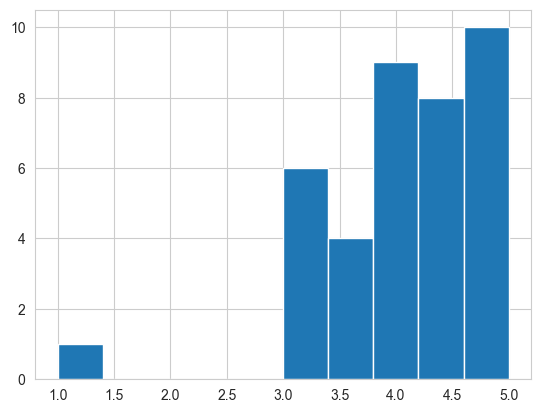

In [25]:
ratings_df.loc[ratings_df['userId'] == 11,'rating'].hist()

In [26]:
ratings_df.loc[ratings_df['userId'] == 11]

,userId,movieId,rating,timestamp
790,11,50,5.0,1391658537
791,11,70,1.0,1391656827
792,11,126,4.0,1391657561
793,11,169,3.0,1391657297
794,11,296,5.0,1391658423
795,11,778,4.5,1391658505
796,11,785,3.5,1391656845
797,11,923,5.0,1391658556
798,11,1027,4.5,1391658634
799,11,1201,5.0,1391658440


* A sampled user(no.11) rates high score for movieid 50 and low score for movieid 70
* MovieId 50's rating has a rating distribution of 4~5 points
* The rating distribution of movieId 70 is evenly distributed
* A sampled user(no.11) seems to prefer Thriller, Action, Crime genre movies

In [27]:
movie_agg_df[movie_agg_df['movieId']==50]

,movieId,num_users_watch,avg_rating,std_rating,title,genres
48,50,201,4.370647,0.731904,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


<Axes: >

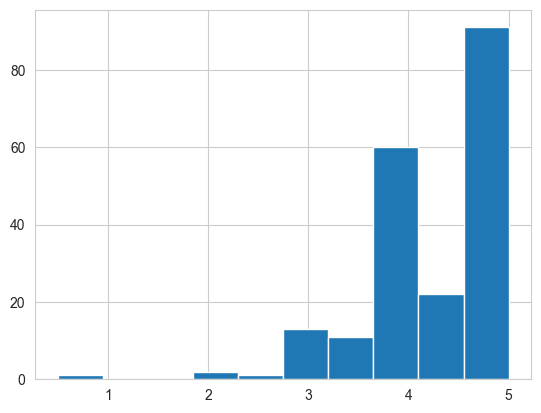

In [30]:
ratings_df.loc[ratings_df['movieId'] == 50,'rating'].hist()

In [34]:
movie_agg_df[movie_agg_df['movieId']==70]

,movieId,num_users_watch,avg_rating,std_rating,title,genres
65,70,48,3.020833,1.129669,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller


<Axes: >

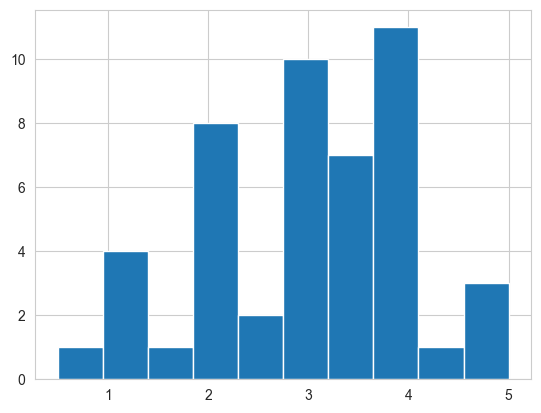

In [31]:
ratings_df.loc[ratings_df['movieId'] == 70,'rating'].hist()

In [36]:
sample_user = ratings_df.loc[ratings_df['userId'] == 11]
sample_user = pd.merge(sample_user, movie_agg_df, how='left', on ='movieId')
sample_user.head()

,userId,movieId,rating,timestamp,num_users_watch,avg_rating,std_rating,title,genres
0,11,50,5.0,1391658537,201,4.370647,0.731904,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
1,11,70,1.0,1391656827,48,3.020833,1.129669,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
2,11,126,4.0,1391657561,10,2.700000,1.059350,"NeverEnding Story III, The (1994)",Adventure|Children|Fantasy
3,11,169,3.0,1391657297,8,2.562500,1.522158,Free Willy 2: The Adventure Home (1995),Adventure|Children|Drama
4,11,296,5.0,1391658423,324,4.256173,0.866897,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [43]:
sample_user['genres'].str.get_dummies(sep='|').sum().sort_values()

Film-Noir       1
Fantasy         1
Romance         2
Horror          2
War             2
Western         2
Children        3
Sci-Fi          4
Mystery         5
IMAX            6
Documentary     6
Comedy         10
Adventure      11
Crime          12
Action         13
Thriller       15
Drama          19
dtype: int64